In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2: ] # Solo columnas de largo y ancho del pétalo
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(2232.0, 4530.0, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(1116.0, 2718.0, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(3348.0, 2718.0, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(2232.0, 906.0, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(4464.0, 906.0, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

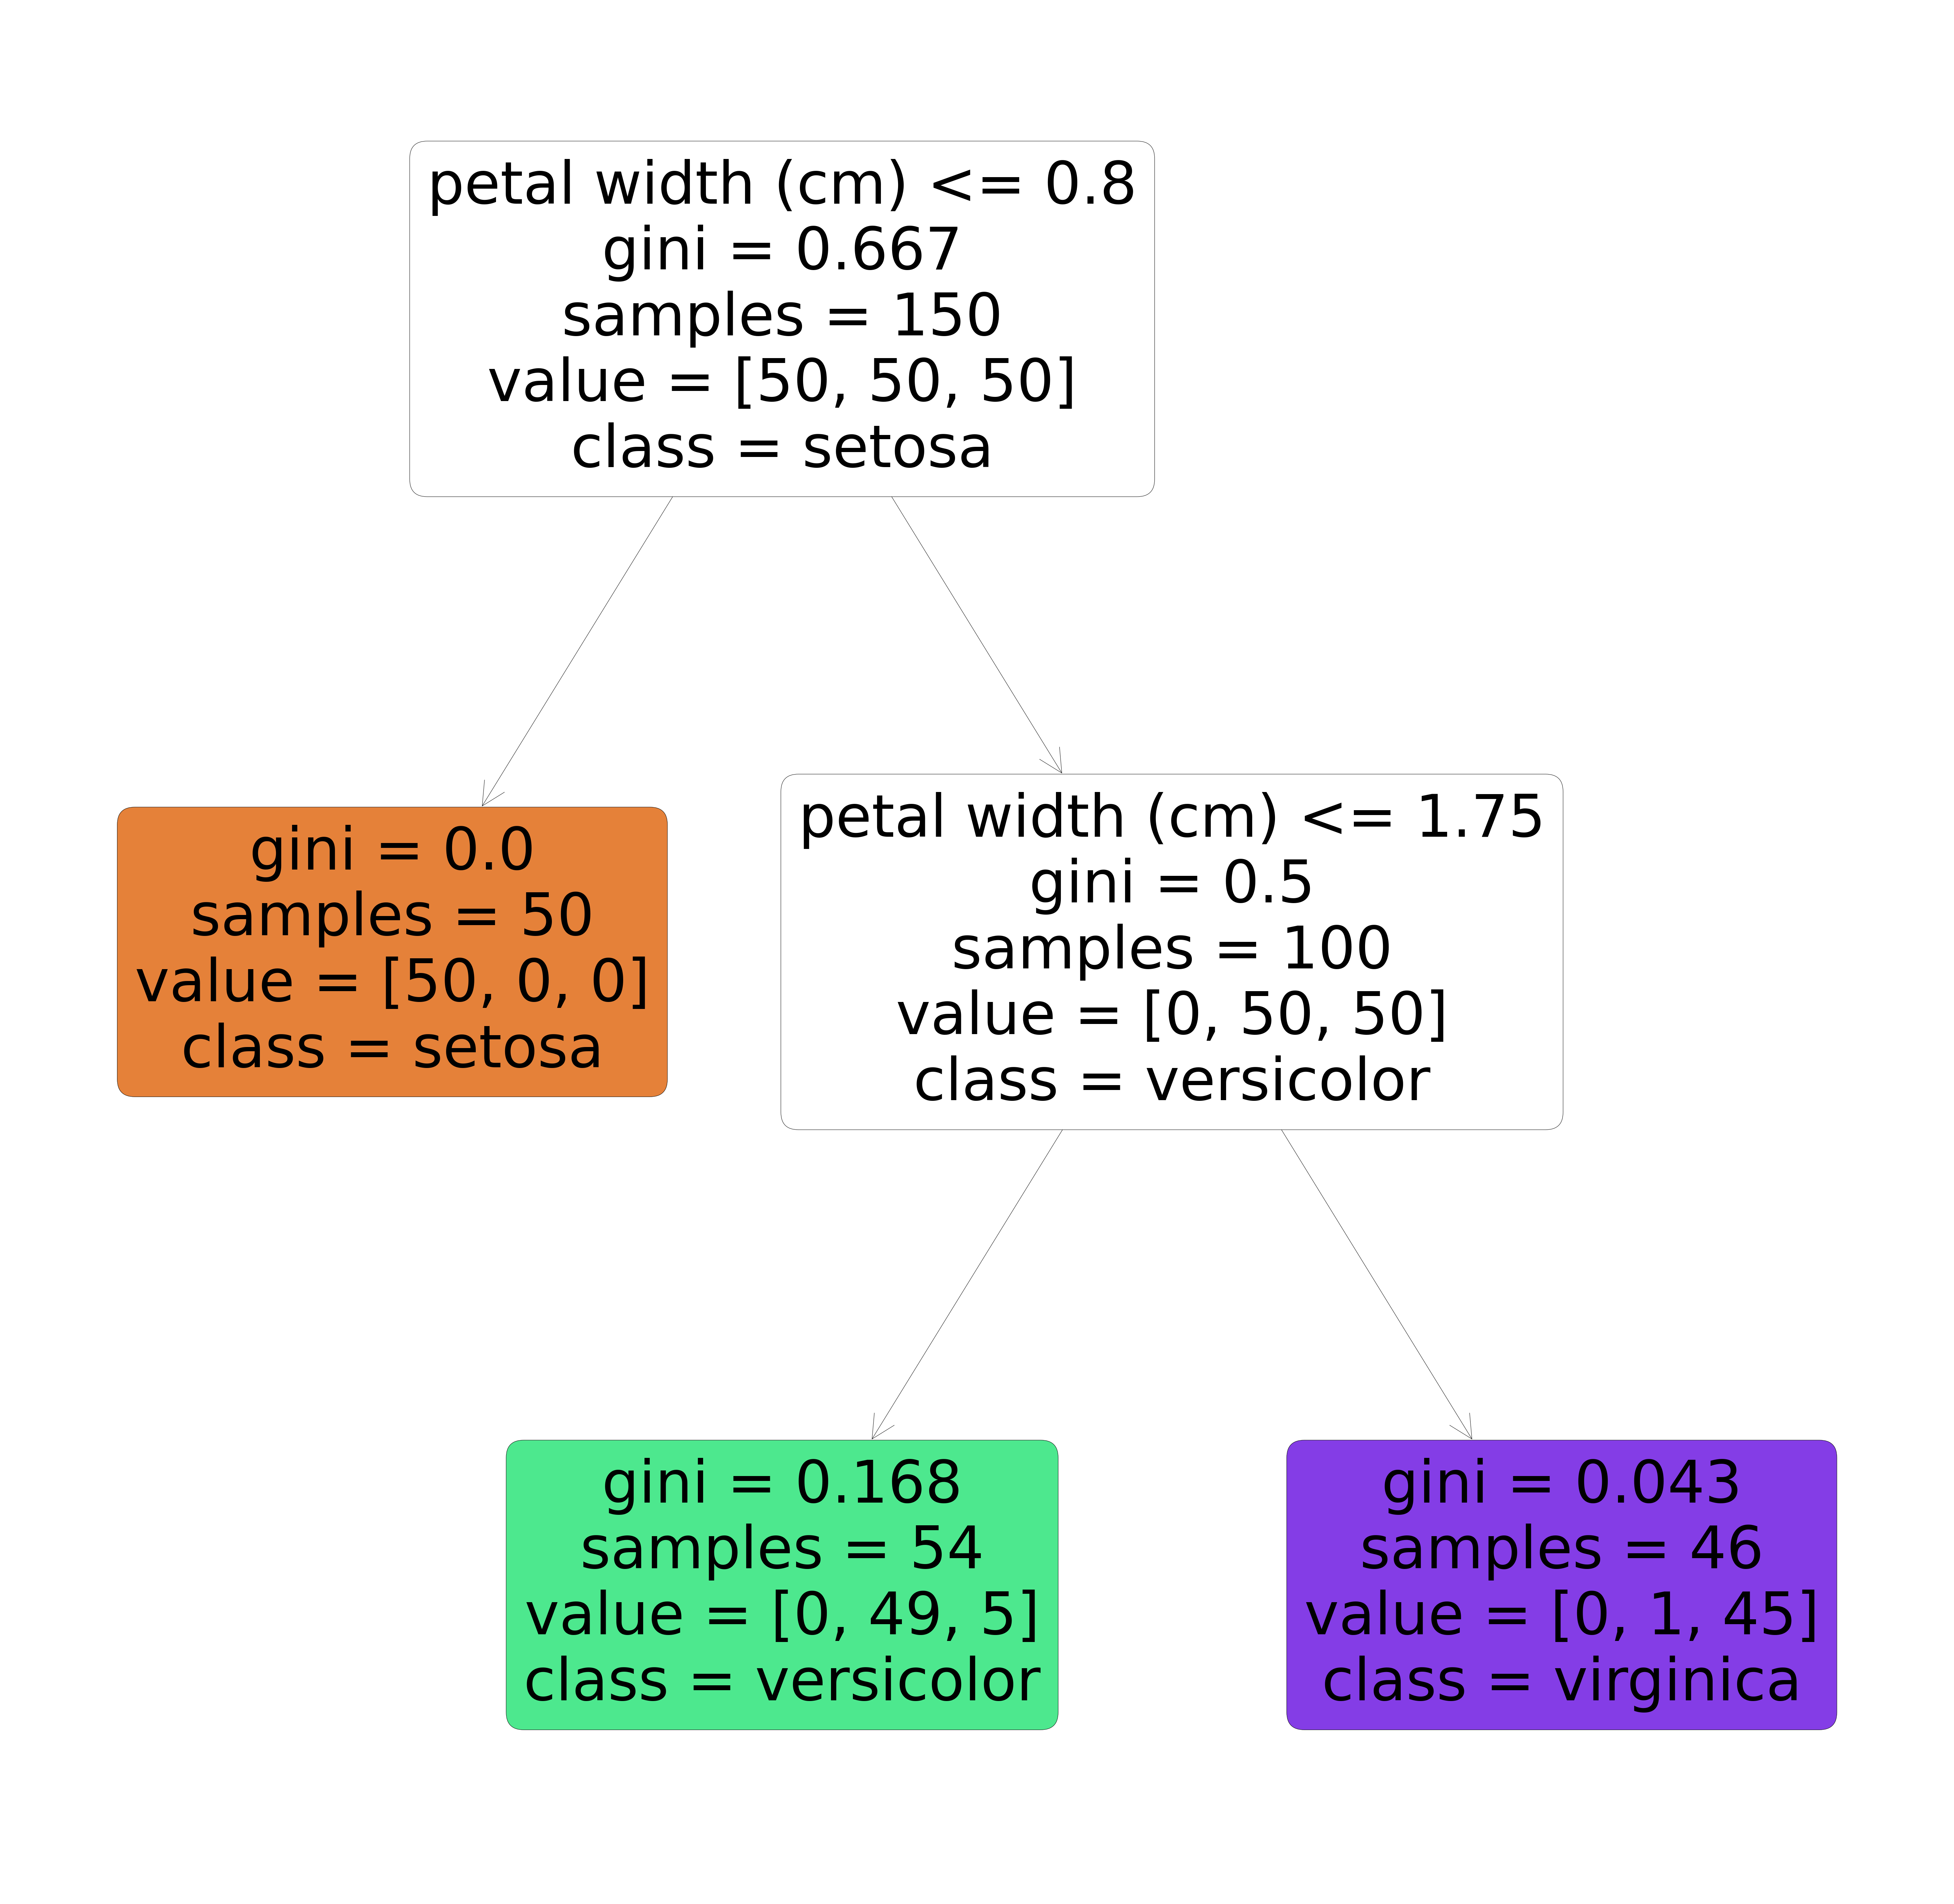

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))
tree.plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [11]:
# Nueva instancia
x_new = [[5, 1.5]]
# Probabilidades por cada clase
print(tree_clf.predict_proba(x_new))
# Clase predicha
print("Esta insancia pertenece a la clase",tree_clf.predict(x_new))


[[0.         0.90740741 0.09259259]]
Esta insancia pertenece a la clase [1]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [13]:
tree_clf.predict(X_test)

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0])

In [14]:
score = tree_clf.score(X_test, y_test)
score

0.9473684210526315

[Text(2232.0, 4530.0, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 38, 39]\nclass = virginica'),
 Text(1116.0, 2718.0, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(3348.0, 2718.0, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]\nclass = virginica'),
 Text(2232.0, 906.0, 'gini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = versicolor'),
 Text(4464.0, 906.0, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica')]

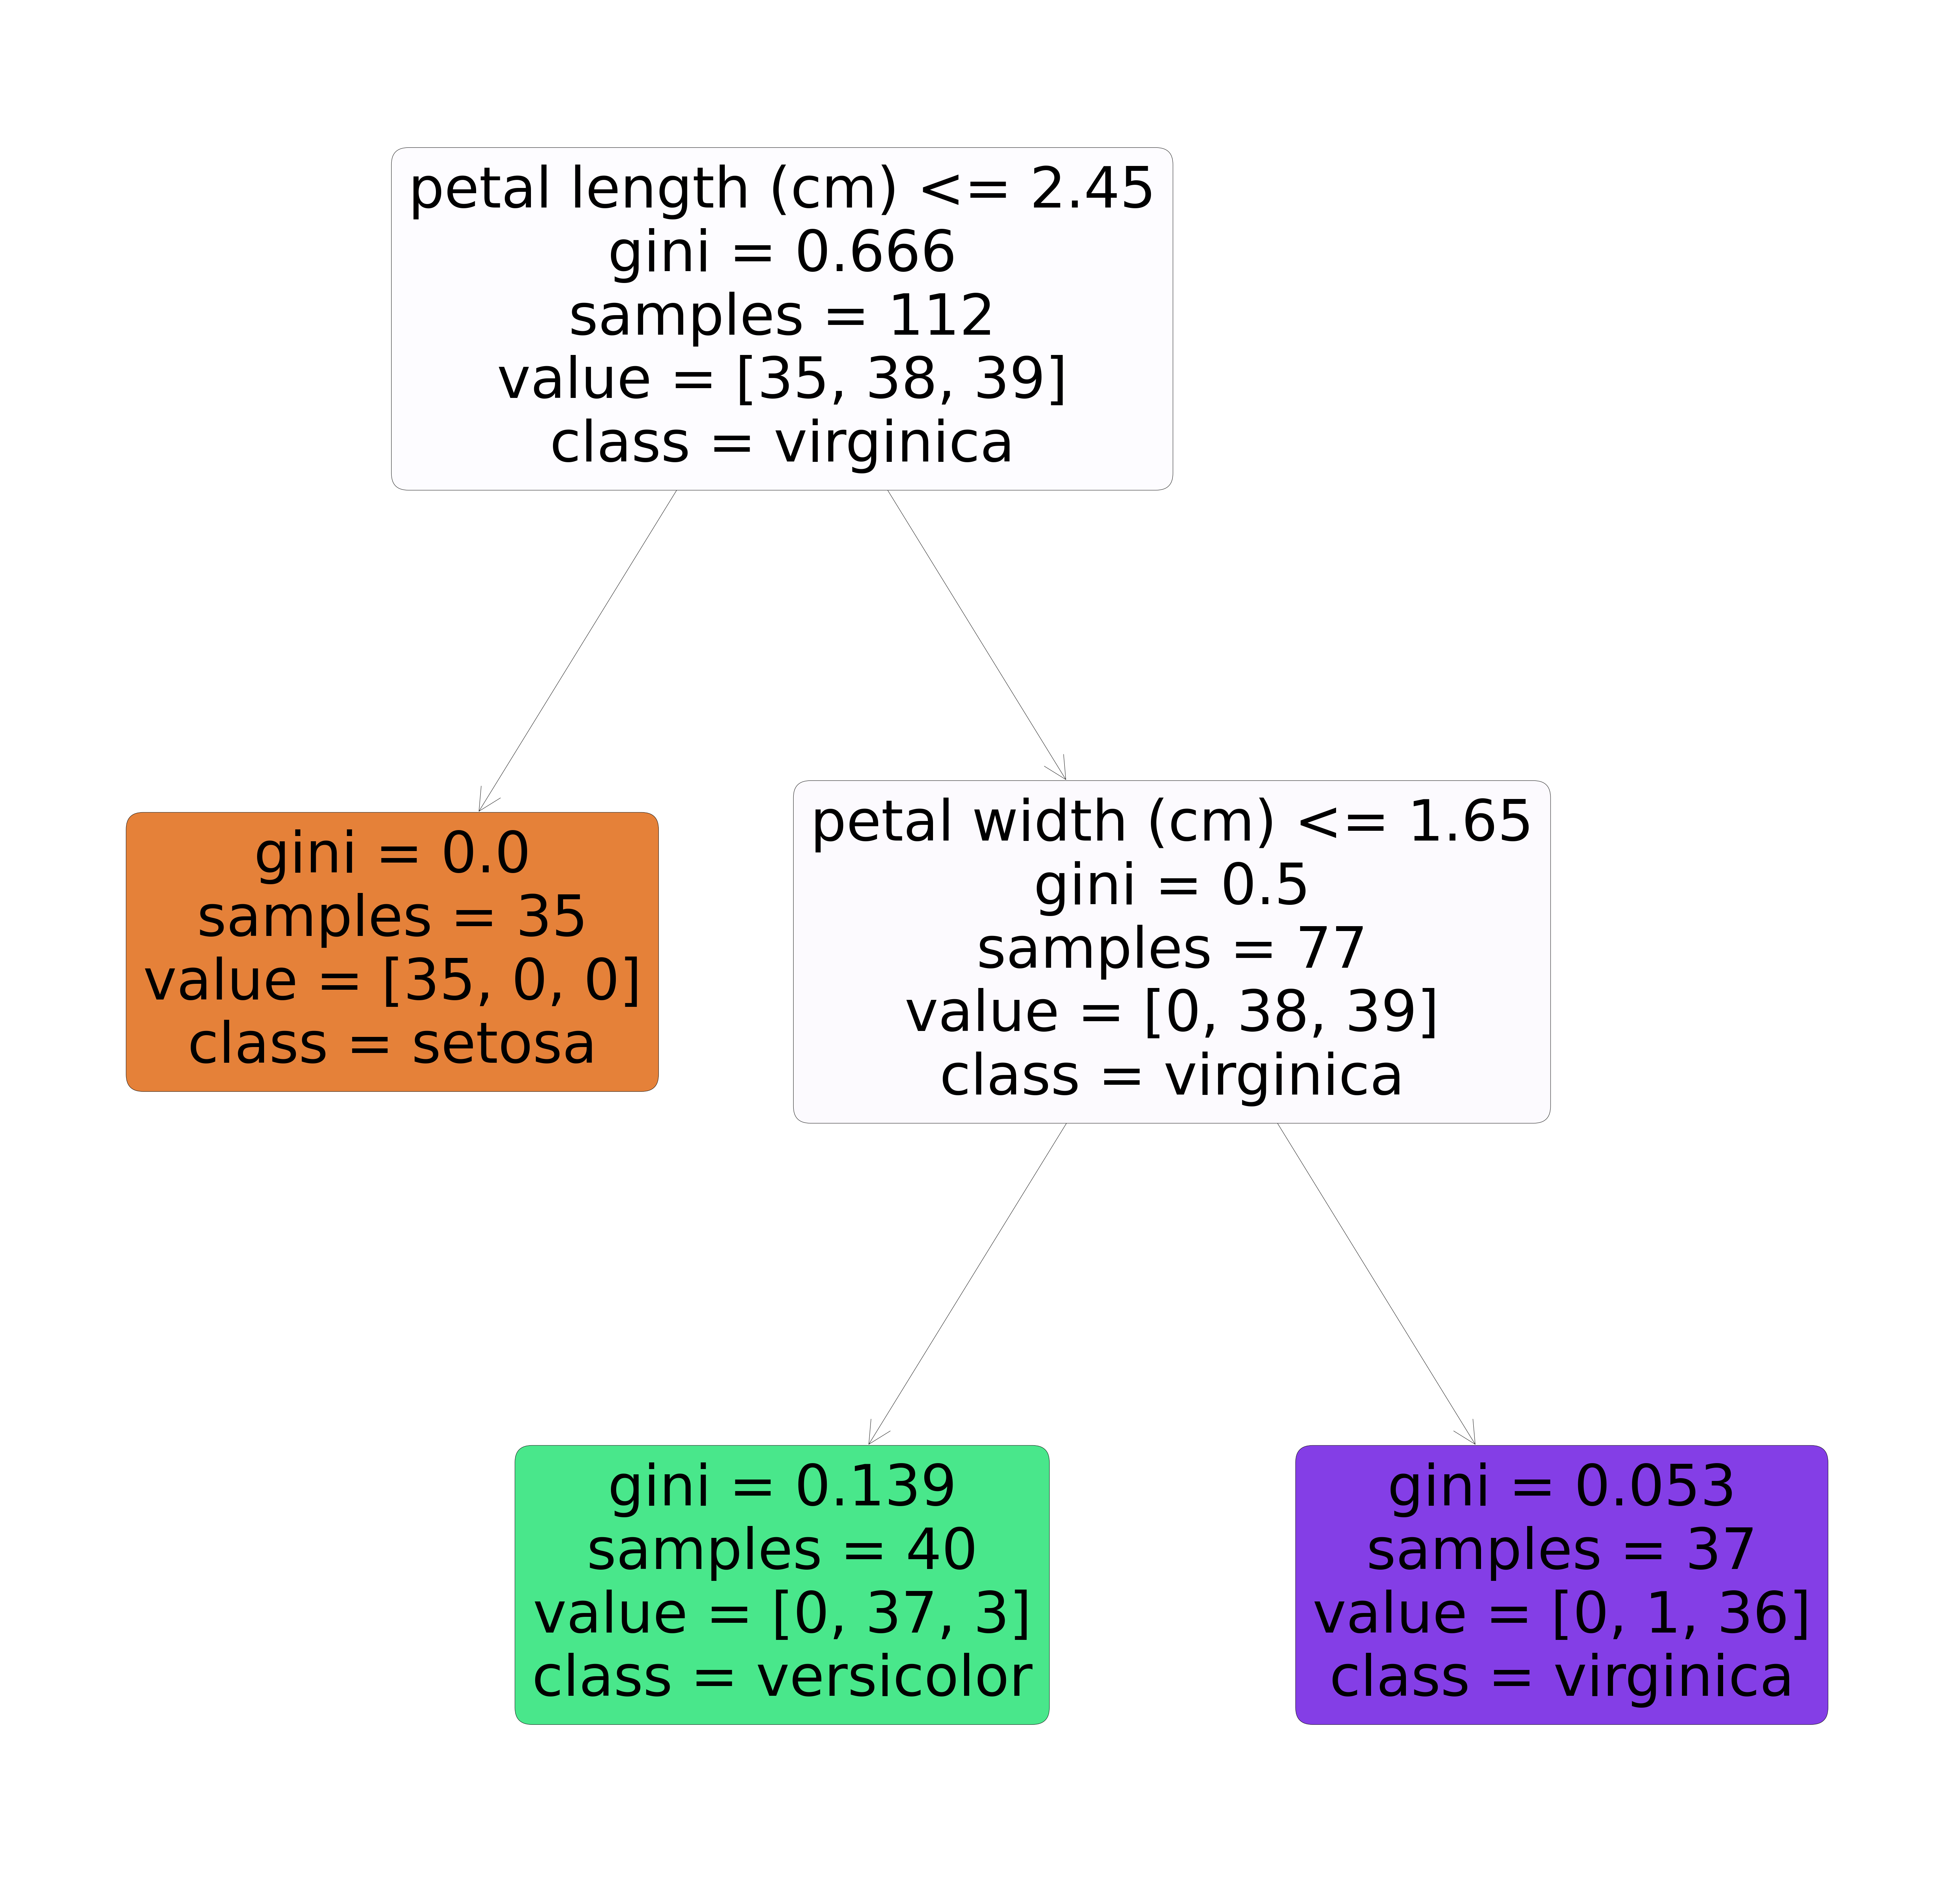

In [17]:
plt.figure(figsize=(100,100))
tree.plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [15]:
# Lista de valores para probar max_depth:
max_depth_range = list(range(1, 6))
# Lista para almacenar el RMSE promedio para cada valor de max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

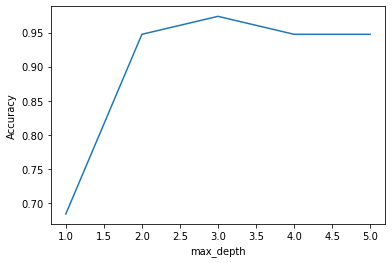

In [16]:
plt.plot(max_depth_range, accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy');

Este codigo sirve para generar llaves en una variable categorica

In [ ]:
from sklearn.preprocessing import LabelEncoder
etiq = LabelEncoder()
eeg_label = etiq.fit_transform(df["specific.disorder"])
eeg_m = {index: label for index, label in 
                  enumerate(etiq.classes_)}
eeg_m

Y este para hacer reajustes en el recall

In [ ]:
from sklearn.metrics import recall_score
recall=0
k=1
aux=0
aux1=0
while(recall<=0.15):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  predictions = knn.predict(X_test)
  recall=recall_score(y_test, predictions, average="macro")
  if (recall==aux):
    aux1=aux1+1
  aux=recall
  if (aux1==5):
    k=k+1
    aux1=0
  if (k==len(X_train)):
    break
  print(recall)